In [1]:
import numpy
np = numpy
from numpy import *

import sklearn
skit = sklearn
from sklearn import *
%matplotlib inline
import scipy
from scipy import *
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from itertools import compress

/home/jaidmin/anaconda3/lib/python3.5/site-packages/sklearn/lda.py:4: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)
/home/jaidmin/anaconda3/lib/python3.5/site-packages/sklearn/qda.py:4: DeprecationWarning: qda.QDA has been moved to discriminant_analysis.QuadraticDiscriminantAnalysis in 0.17 and will be removed in 0.19.
  "in 0.17 and will be removed in 0.19.", DeprecationWarning)


In [2]:
vars = {}
a = scipy.io.loadmat("./ex6/ex6data1.mat",vars)
X = vars['X']
y= vars['y']
mars = {}
q = scipy.io.loadmat("./ex6/ex6data3.mat",mars)
X_nonlinear = mars['X']
y_nonlinear = mars['y']

In [25]:
def plot_decision_regions(X,y,classifier,resolution=0.02):
    markers  = ('s', 'x', 'o', '^','v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #plot decision surface
    
    x1_min , x1_max = X[:,0].min() , X[:,0].max() 
    x2_min , x2_max = X[:,1].min() , X[:,1].max()
    
    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    for idx,item in enumerate(np.unique(y)):
        print(idx,item)

        plot_x1 = list(compress(X[:,0],y==item))
        plot_x2 = list(compress(X[:,1],y==item))
    
        plt.scatter(plot_x1,plot_x2,c=cmap(idx),marker=markers[idx] )
    


In [21]:
value = 1/2*(0.01)**2
clf = sklearn.svm.SVC(C=1.0, kernel='rbf',gamma=1/0.02,random_state=0)

In [22]:
clf.fit(X=X_nonlinear,y=y_nonlinear)

/home/jaidmin/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=50.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

0 0
1 1


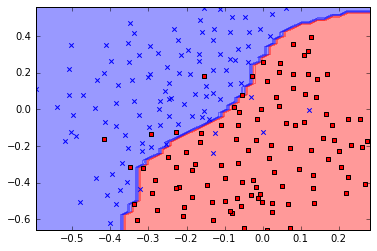

In [23]:
plot_decision_regions(X_nonlinear,y_nonlinear,clf)

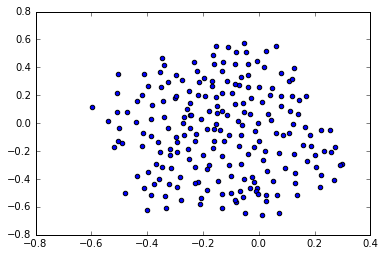

In [24]:
plt.scatter(X_nonlinear[:,0],X_nonlinear[:,1])

In [55]:
qq=np.ones((5))
ravel(qq).shape

(5,)